# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## Select the dataset

### Read data from archive.
Look at the raw data with a text editor and try to understand if:
1. if it is a `csv` file or other
1. for `csv`, what is the *separator* character (`,`,`;`,`\t`, ...)
1. for `csv`, is there a *header*? it is a first row containing column names
1. if there is no header, look for reasonable names, e.g. for *UCI* a `.names` file
1. if there is no header, look at the documentation of `read_csv` to see how to specify column names
1. try to understand if the dataset is supervised, and what is the *target class*

Hint: your python notebook front-end (either jupyter, jupyter lab, VSC, google Colab) can also be a text file viewer

The raw file is `winequality-red.csv` 

Use `quality` as **target**


Use the read_csv() method of pandas dataframe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Use `df` as the dataframe name

Assign column names if necessary, assign separator if necessary


In [4]:
url = 'winequality-red.csv'
df = pd.read_csv(url, sep = ';')

### Show column names
Use the `columns` attribute of pandas on `df`

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Show portion of data
Use the `head` method of pandas dataframe

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Show histograms for all numeric values 
Use the `DataFrame.hist` method of Pandas. You can set the `figsize` parameter to adjust size

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

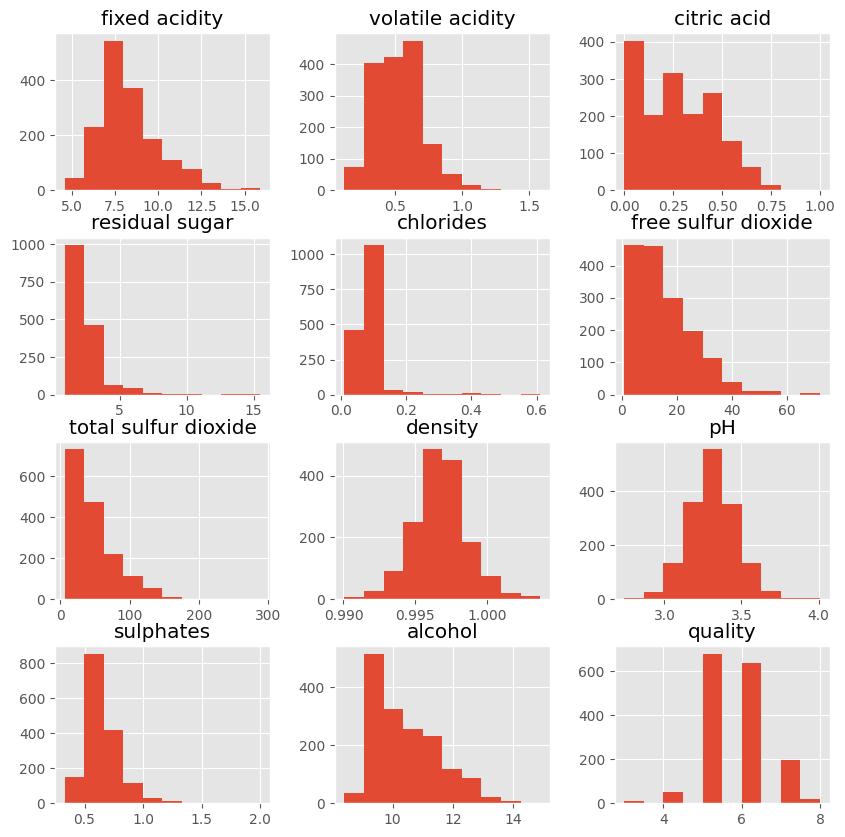

In [7]:
df.hist(figsize=(10,10))

Is there anything to observe? balanced distributions? skewed distributions? outliers?

### Show synthetic description

The **describe** method of pandas dataframes gives a short summary

Examine in the documentation if there are interesting options in the method

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Are there *missing values*? How could we see it from the description?

### Plot an histogram for "the target column"
Use the `hist` method of `matplotlib.pyplot` applied to the target column of `df`

array([[<Axes: title={'center': 'quality'}>]], dtype=object)

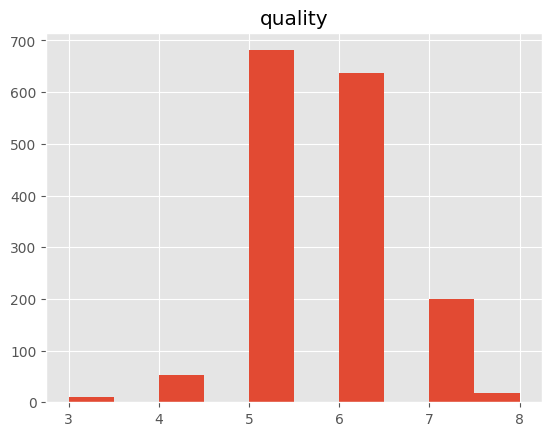

In [20]:
df.hist(column='quality')

## Pairplot
The `pairplot` of the *Seaborn* library is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (the `hue` parameter). In this specific case the high number of attributes makes the representation not very clear.

Use df as argument to the `pairplot` method of Seaborn, specifying also `hue = '...'` and `diag_kind='kde'` (try also other options)

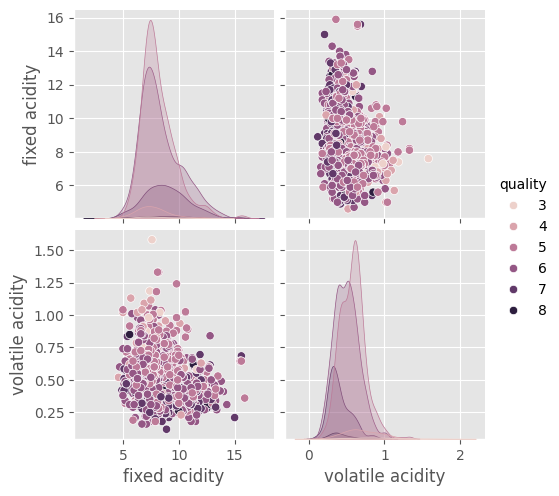

In [8]:
sns.pairplot(df,hue='quality',diag_kind='kde',vars = ['fixed acidity','volatile acidity'])

## Show the *correlation*
[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
[Wikipedia Reference](https://en.wikipedia.org/wiki/Correlation)

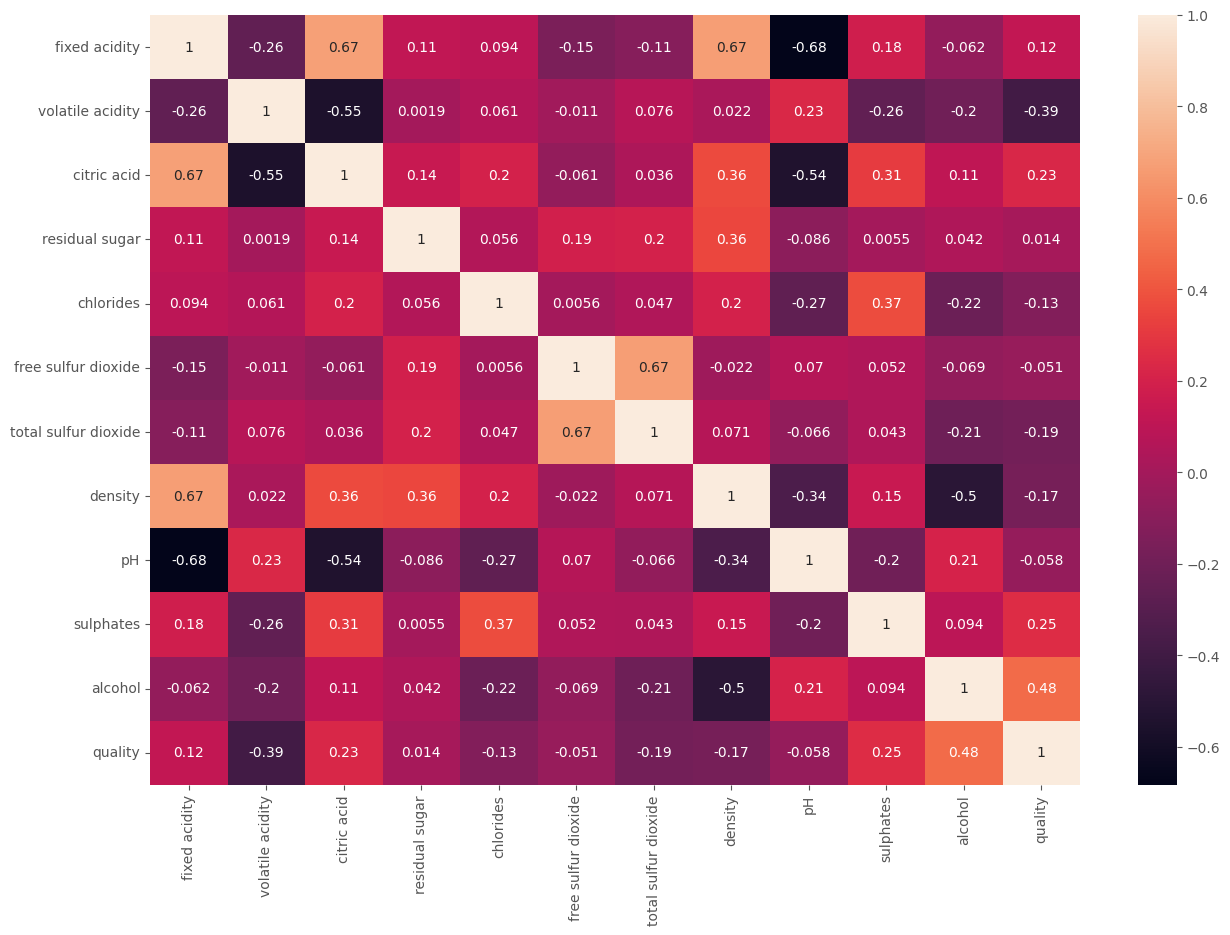

In [33]:
corr = df.corr()
plt.figure(figsize=(15,10)) # set X and Y size
sns.heatmap(corr, 
            #cmap="YlGnBu", 
            annot=True
            )
plt.show()

## Boxplot
Now we will explore the distribution of the values inside each column using the `boxplot`.

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data <br> (*from the official Seaborn documentation*)

Hint:
- write a loop over all the columns to generate an individual boxplot for each column
- use the `subplot` method of `pyplot` to produce a 3x4 array of boxplots


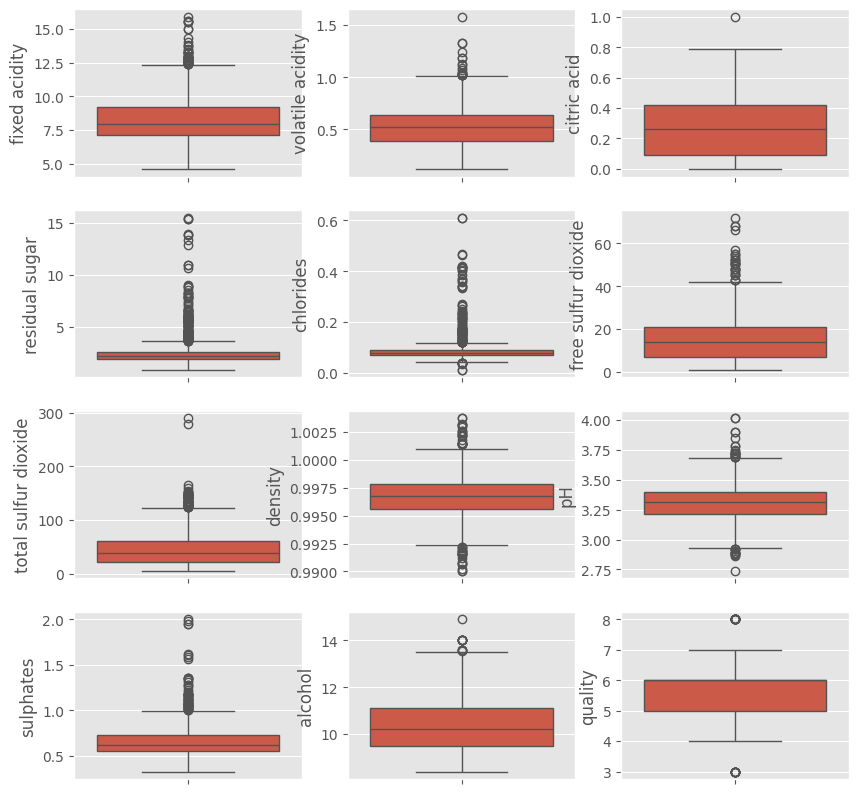

In [34]:
plt.figure(figsize=(10,10))
idx = 1
for col in df.columns:
    plt.subplot(4,3,idx)
    sns.boxplot(data=df[col])
    idx+=1

Comment what you see, are there relevant situations? outliers?

### Another way to produce a *boxplot*
As an alternative, you can generate a unique boxplot, using the entire dataframe as parameter

<Axes: >

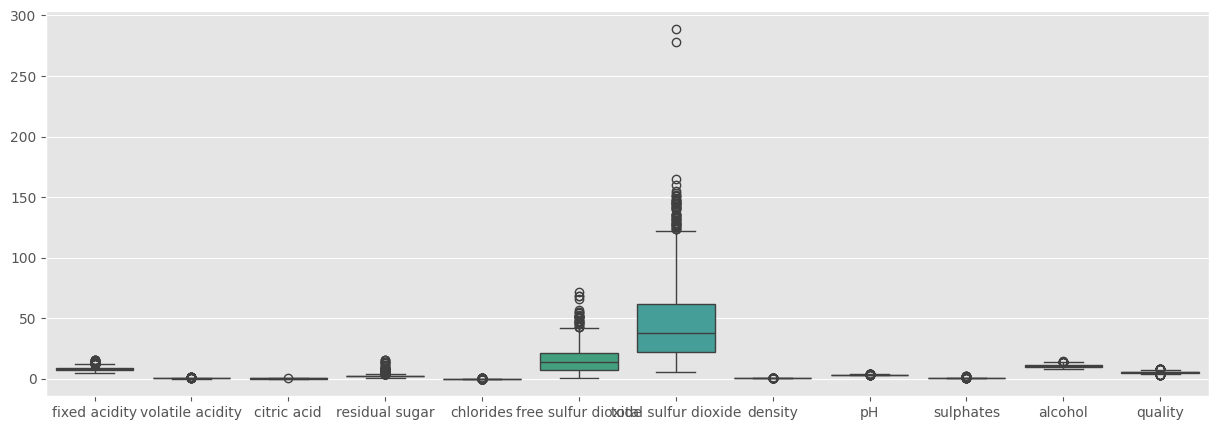

In [19]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df)

What's a problem of this visualisation?

In [12]:
# we have a problem with the scale: different attributes have different ranges

### Separate the **predictors** from the target
You can make a list named `predictors` from the column names and then use the .remove() method of lists to exclude the target from the predictors. When done, show the predictors 

In [38]:
predictors = list(df.columns)
target = 'quality'
predictors.remove(target)
print(predictors)
print(target)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


### A boxplot for each attribute and the target
Make a loop on the predictors and for each member of predictors make a boxplot: put the predictor p in the `y` axis, the target in the `x` axis

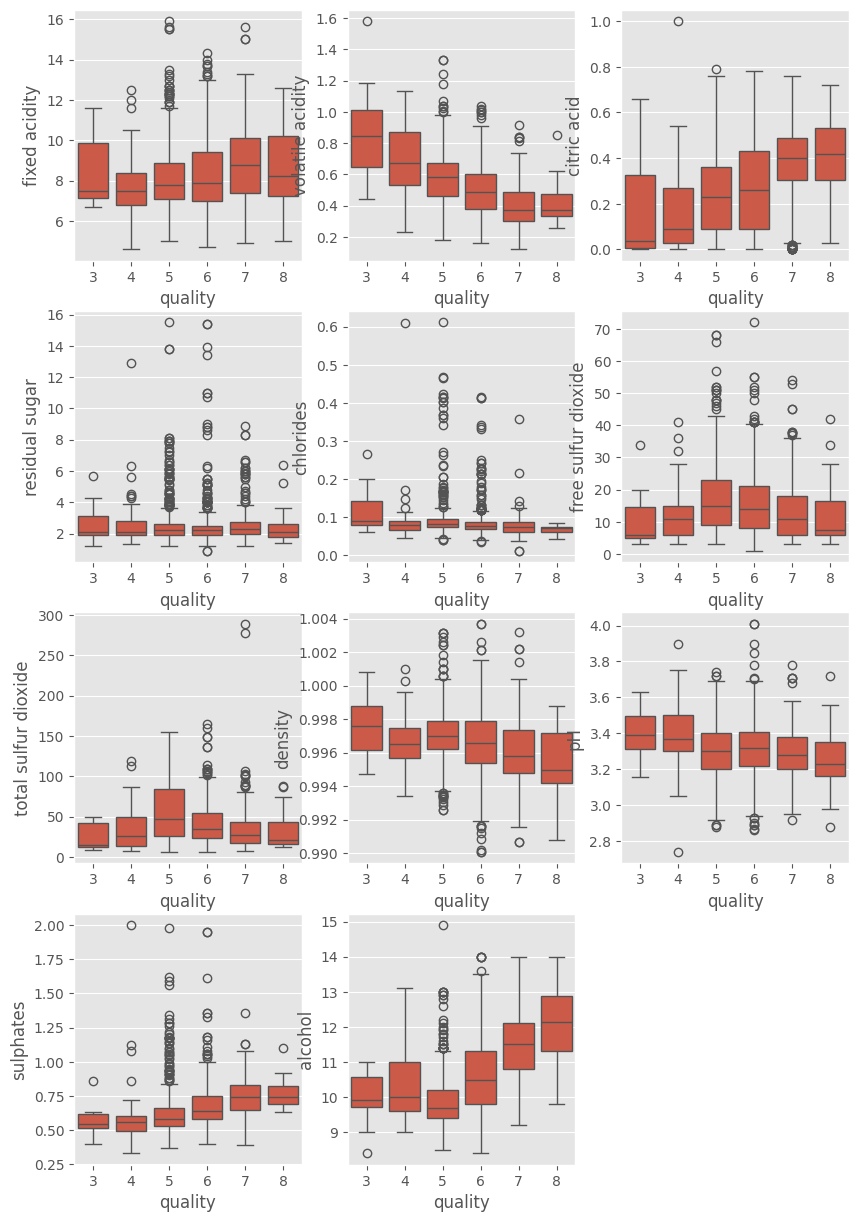

In [41]:
plt.figure(figsize=(10,15))
idx = 1
for predictor in predictors:
    plt.subplot(4,3,idx)
    sns.boxplot(x=target,y=predictor, data = df)
    idx+=1
plt.show()

You will see that the boxplots of the predictors change significantly for each target value